This top code block creates the account so do not run it more than once.

In [8]:
service = QiskitRuntimeService(name='Paul')

This is where the Hello World code starts

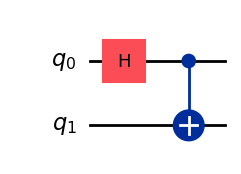

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [10]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [12]:
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


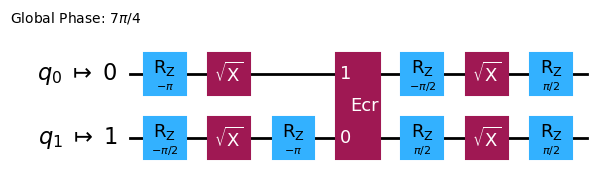

In [15]:
#backend = service.least_busy(simulator=False, operational=True)
backend = service.backend('ibm_brisbane')
#backend = service.backend('ibm_torino')
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

The code block below actually runs a job on the actual quantum computer and eats up time so run sparingly.

In [16]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d37l1lgitjus73f6dou0


In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(name='Paul')
job = service.job('d2l7bcmhb60s73ctknm0')
job_result = job.result()

for idx, pub_result in enumerate(job_result):
    print(f"Expectation values for pub {idx}: {pub_result.data.evs}")

Expectation values for pub 0: [0.02848746 0.00623163 0.02222175 0.01132051 1.02434802 1.0534675 ]


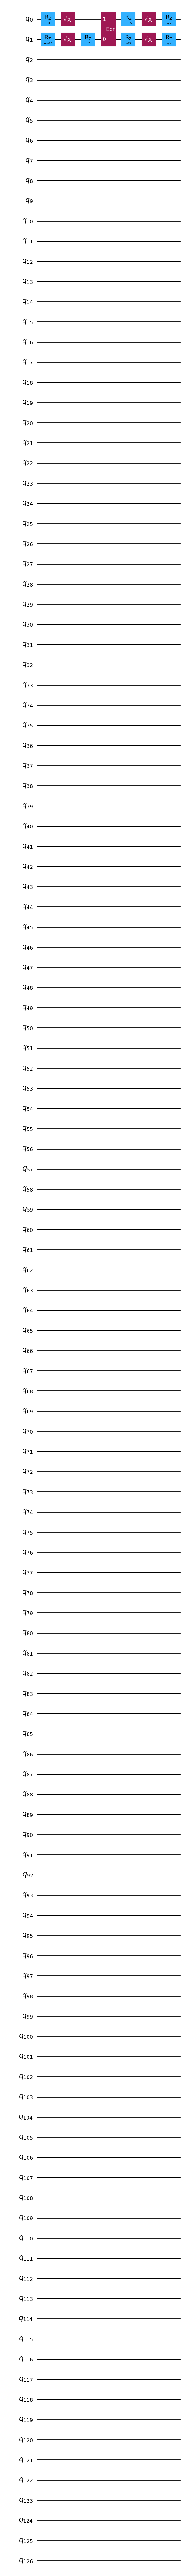

In [1]:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
qreg q[127];
rz(-pi) q[0];
sx q[0];
rz(-pi/2) q[1];
sx q[1];
rz(-pi) q[1];
ecr q[1],q[0];
rz(-pi/2) q[0];
sx q[0];
rz(pi/2) q[0];
rz(pi/2) q[1];
sx q[1];
rz(pi/2) q[1];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)
circuit.draw("mpl")

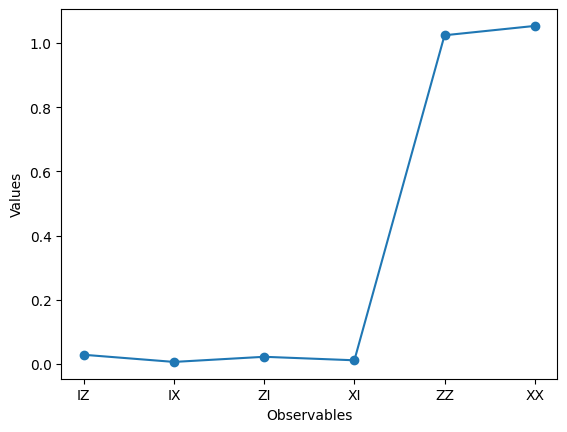

In [13]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [14]:
from qiskit import QuantumCircuit
 
 
def get_qc_for_n_qubit_GHZ_state(n: int) -> QuantumCircuit:
    """This function will create a qiskit.QuantumCircuit (qc) for an n-qubit GHZ state.
 
    Args:
        n (int): Number of qubits in the n-qubit GHZ state
 
    Returns:
        QuantumCircuit: Quantum circuit that generate the n-qubit GHZ state, assuming all qubits start in the 0 state
    """
    if isinstance(n, int) and n >= 2:
        qc = QuantumCircuit(n)
        qc.h(0)
        for i in range(n - 1):
            qc.cx(i, i + 1)
    else:
        raise Exception("n is not a valid input")
    return qc
 
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)

In [15]:
from qiskit.quantum_info import SparsePauliOp
 
# ZZII...II, ZIZI...II, ... , ZIII...IZ
operator_strings = [
    "Z" + "I" * i + "Z" + "I" * (n - 2 - i) for i in range(n - 1)
]
print(operator_strings)
print(len(operator_strings))
 
operators = [SparsePauliOp(operator) for operator in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [16]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(name='Paul')
 
backend = service.least_busy(
    simulator=False, operational=True, min_num_qubits=100
)
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
 
isa_circuit = pm.run(qc)
isa_operators_list = [op.apply_layout(isa_circuit.layout) for op in operators]

In [17]:
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"
 
# Create an Estimator object
estimator = Estimator(backend, options=options)

In [18]:
# Submit the circuit to Estimator
job = estimator.run([(isa_circuit, isa_operators_list)])
job_id = job.job_id()
print(job_id)

d2v2kfc7sg0c73aq8j0g


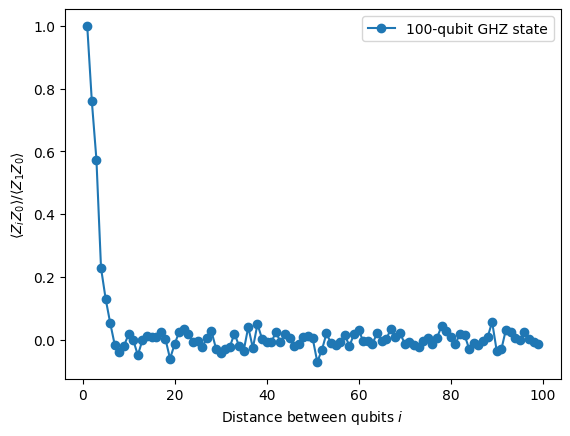

In [19]:
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService
 
# data
data = list(range(1, len(operators) + 1))  # Distance between the Z operators
result = job.result()[0]
values = result.data.evs  # Expectation value at each Z operator.
values = [
    v / values[0] for v in values
]  # Normalize the expectation values to evaluate how they decay with distance.
 
# plotting graph
plt.plot(data, values, marker="o", label="100-qubit GHZ state")
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r"$\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $")
plt.legend()
plt.show()

End of Hello World and start of Circuit Library in Circuits and Operators under Tools.  This first code block is how to create Standard Gates.

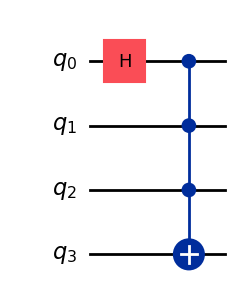

In [30]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
 
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0, 1, 2, 3])
qc.draw("mpl")

This is N-local circuits.  These circuits alternate layers of single-qubit rotation gates with layers of multi-qubit entangling gates.

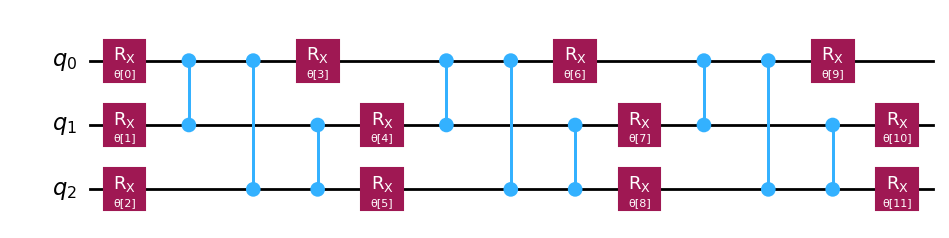

In [31]:
from qiskit.circuit.library import n_local
 
two_local = n_local(3, "rx", "cz")
two_local.draw("mpl")

In [32]:
two_local.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

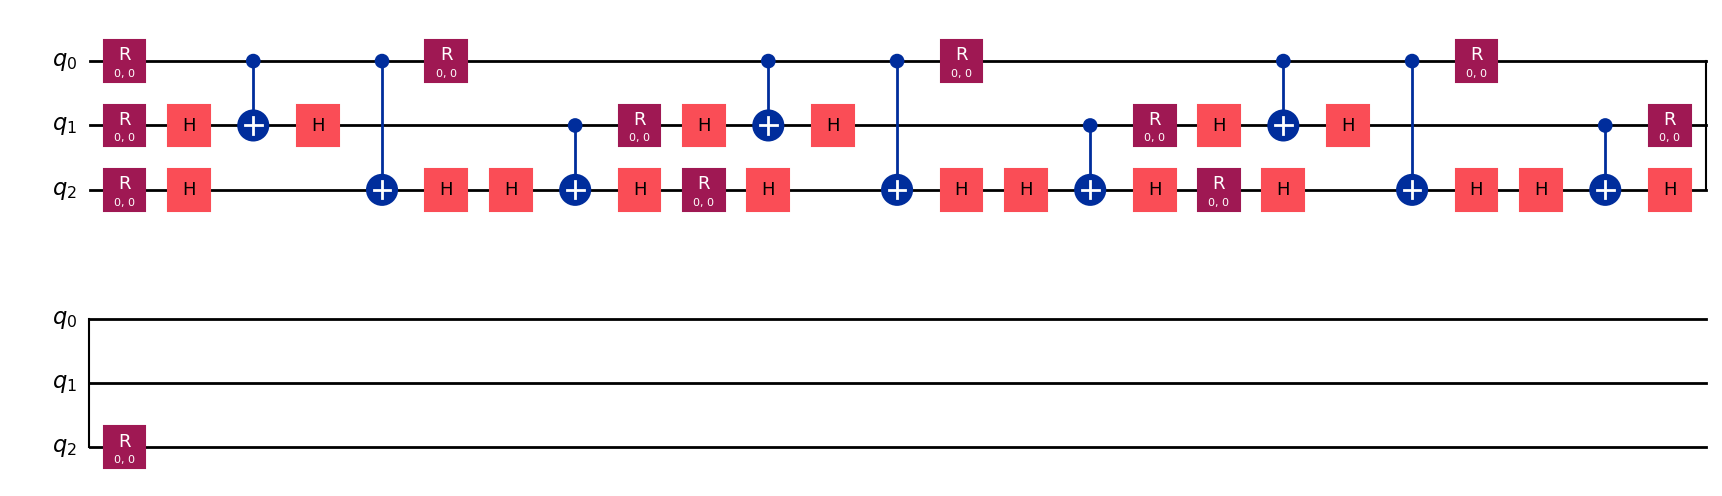

In [33]:
bound_circuit = two_local.assign_parameters(
    {p: 0 for p in two_local.parameters}
)
bound_circuit.decompose().draw("mpl")

Data-encoding circuits

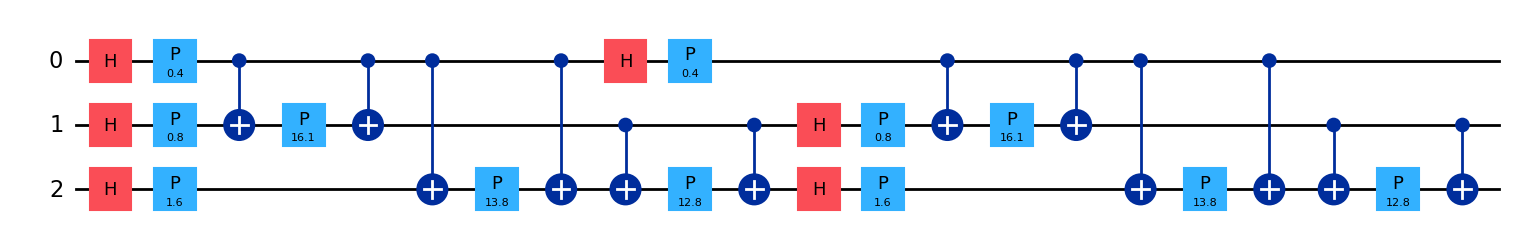

In [34]:
from qiskit.circuit.library import zz_feature_map
 
features = [0.2, 0.4, 0.8]
feature_map = zz_feature_map(feature_dimension=len(features))
 
encoded = feature_map.assign_parameters(features)
encoded.draw("mpl")

This code below is a Time-evolution circuit

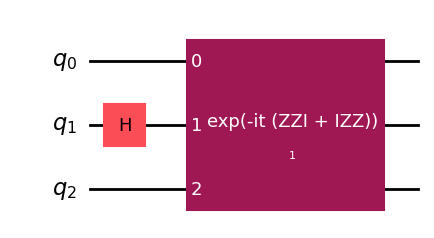

In [35]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
 
 
# Prepare an initial state with a Hadamard on the middle qubit
state = QuantumCircuit(3)
state.h(1)
 
hamiltonian = SparsePauliOp(["ZZI", "IZZ"])
evolution = PauliEvolutionGate(hamiltonian, time=1)
 
# Evolve state by appending the evolution gate
state.compose(evolution, inplace=True)
 
state.draw("mpl")

this code benchmarks to show how well the hardware is working.  This shows "quantum volume" which is how accurately a quantum computer executes a type of random quantum circuit.

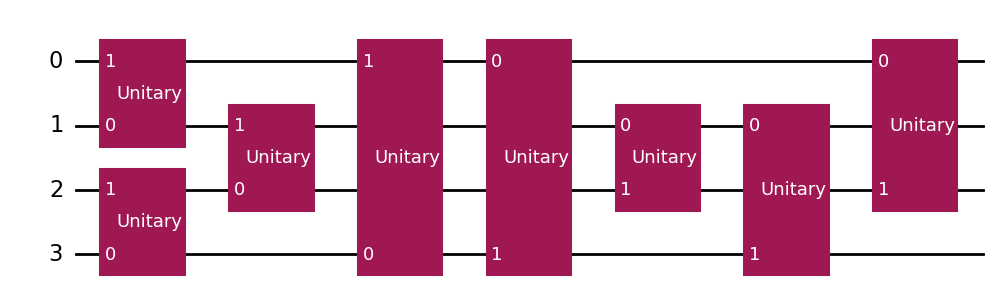

In [26]:
from qiskit.circuit.library import quantum_volume
 
quantum_volume(4).draw("mpl")

Arithmetic circuits

Arithmetic operations are classical functions, such as adding integers and bit-wise operations. These may be useful with algorithms such as amplitude estimation for finance applications, and in algorithms like the HHL algorithm, which solves linear systems of equations.

As an example, let’s try adding two three-bit numbers using a "ripple-carry" circuit to perform in-place addition (FullAdderGate). This adder adds two numbers (we'll call them "A" and "B") and writes the result to the register that held B. In the following example, A=2 and B=3.

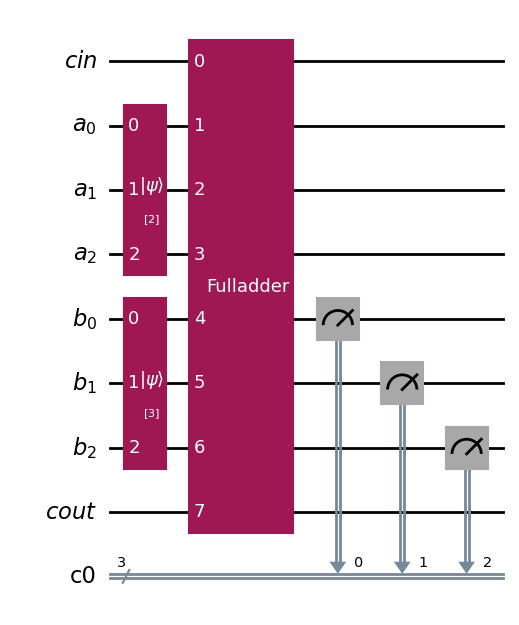

In [27]:
from qiskit.circuit.library import FullAdderGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
adder = FullAdderGate(3)  # Adder of 3-bit numbers
 
# Create the number A=2
reg_a = QuantumRegister(3, "a")
number_a = QuantumCircuit(reg_a)
number_a.initialize(2)  # Number 2; |010>
 
# Create the number B=3
reg_b = QuantumRegister(3, "b")
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)  # Number 3; |011>
 
# Create a circuit to hold everything, including a classical register for
# the result
qregs = [
    QuantumRegister(1, "cin"),
    QuantumRegister(3, "a"),
    QuantumRegister(3, "b"),
    QuantumRegister(1, "cout"),
]
reg_result = ClassicalRegister(3)
circuit = QuantumCircuit(*qregs, reg_result)
 
# Compose number initializers with the adder. Adder stores the result to
# register B, so we'll measure those qubits.
circuit = (
    circuit.compose(number_a, qubits=reg_a)
    .compose(number_b, qubits=reg_b)
    .compose(adder)
)
circuit.measure(reg_b, reg_result)
circuit.draw("mpl")

In [36]:
from qiskit.primitives import StatevectorSampler
 
result = StatevectorSampler().run([circuit]).result()
 
print(f"Count data:\n {result[0].data.c0.get_int_counts()}")

Count data:
 {5: 1024}


This is the beginning of the Construct circuits section

In [37]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.qubits

[<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>]

In [38]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=())]

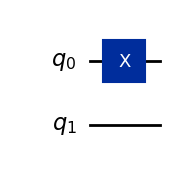

In [39]:
qc.draw("mpl")

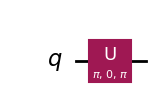

In [40]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw("mpl")

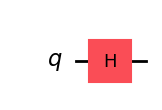

In [41]:
from qiskit.circuit.library import HGate
 
qc = QuantumCircuit(1)
qc.append(
    HGate(),  # New HGate instruction
    [0],  # Apply to qubit 0
)
qc.draw("mpl")

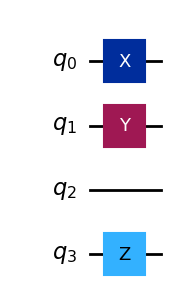

In [42]:
qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)
 
# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")

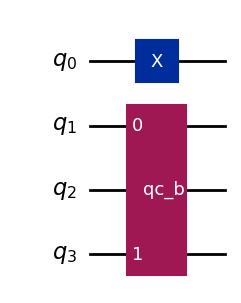

In [43]:
inst = qc_b.to_instruction()
qc_a.append(inst, [1, 3])
qc_a.draw("mpl")

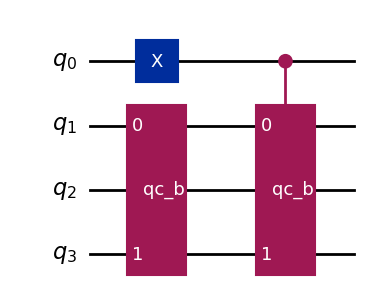

In [44]:
gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 1, 3])
qc_a.draw("mpl")

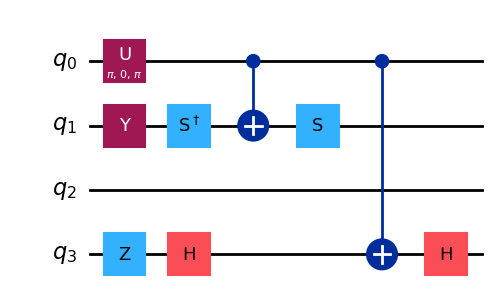

In [45]:
qc_a.decompose().draw("mpl")

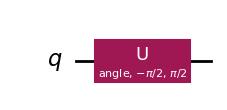

In [46]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.circuit import Parameter
 
angle = Parameter("angle")  # undefined number
 
# Create and optimize circuit once
qc = QuantumCircuit(1)
qc.rx(angle, 0)
qc = generate_preset_pass_manager(
    optimization_level=3, basis_gates=["u", "cx"]
).run(qc)
 
qc.draw("mpl")

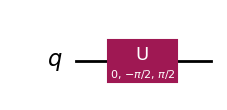

In [47]:
circuits = []
for value in range(100):
    circuits.append(qc.assign_parameters({angle: value}))
 
circuits[0].draw("mpl")

In [48]:
qc.parameters

ParameterView([Parameter(angle)])

Start of Variational algorithm design

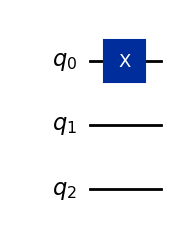

In [49]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3)
qc.x(0)
 
qc.draw("mpl")

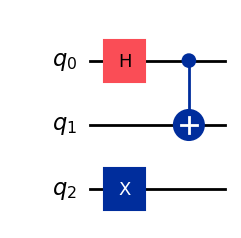

In [50]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.x(2)
 
qc.draw("mpl")

/tmp/ipykernel_3522/3760914331.py:4: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)


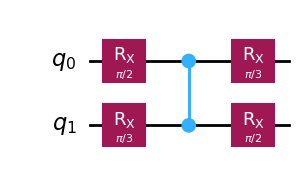

In [51]:
from qiskit.circuit.library import TwoLocal
from math import pi
 
reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 3, pi / 2]
 
reference_circuit = reference_circuit.assign_parameters(theta_list)
 
reference_circuit.decompose().draw("mpl")

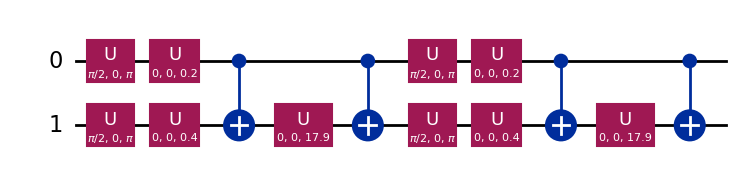

In [52]:
from qiskit.circuit.library import zz_feature_map
 
data = [0.1, 0.2]
 
zz_feature_map_reference = zz_feature_map(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.assign_parameters(data)
zz_feature_map_reference.decompose().draw("mpl")

This section below is Fractional Gates.  This page introduces two newly supported gate types on the IBM Quantum® fleet of QPUs. These fractional gates are supported on Heron QPUs in the form of:

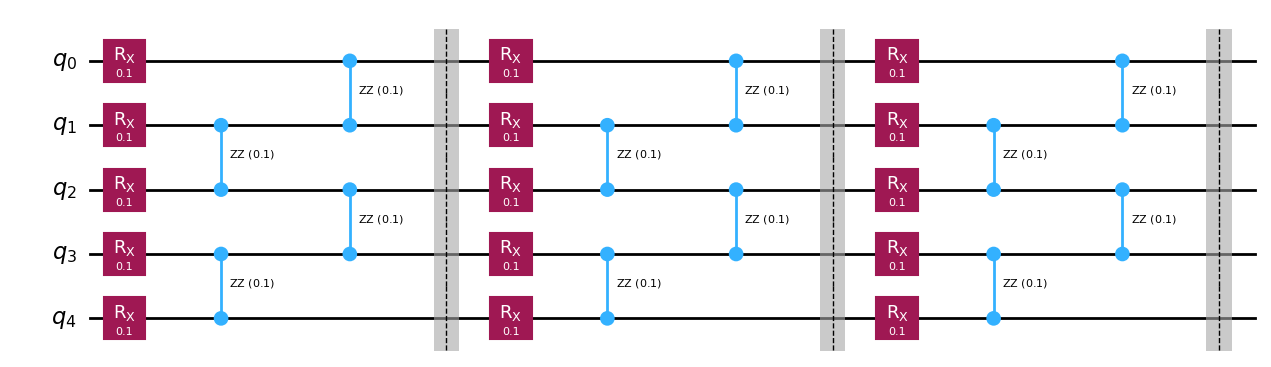

In [53]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization.timeline import draw as draw_timeline, IQXSimple
 
from qiskit_ibm_runtime import QiskitRuntimeService
 
 
num_qubits = 5
num_time_steps = 3
rx_angle = 0.1
rzz_angle = 0.1
 
ising_circuit = QuantumCircuit(num_qubits)
for i in range(num_time_steps):
    # rx layer
    for q in range(num_qubits):
        ising_circuit.rx(rx_angle, q)
    for q in range(1, num_qubits - 1, 2):
        ising_circuit.rzz(rzz_angle, q, q + 1)
    # 2nd rzz layer
    for q in range(0, num_qubits - 1, 2):
        ising_circuit.rzz(rzz_angle, q, q + 1)
    ising_circuit.barrier()
ising_circuit.draw("mpl")

In [55]:
service = QiskitRuntimeService()
backend_fractional = service.backend("ibm_torino", use_fractional_gates=True)
backend_conventional = service.backend(
    "ibm_torino", use_fractional_gates=False
)
 
pm_fractional = generate_preset_pass_manager(
    optimization_level=3, backend=backend_fractional, scheduling_method="alap"
)
pm_conventional = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend_conventional,
    scheduling_method="alap",
)
 
ising_circuit_fractional = pm_fractional.run(ising_circuit)
ising_circuit_conventional = pm_conventional.run(ising_circuit)

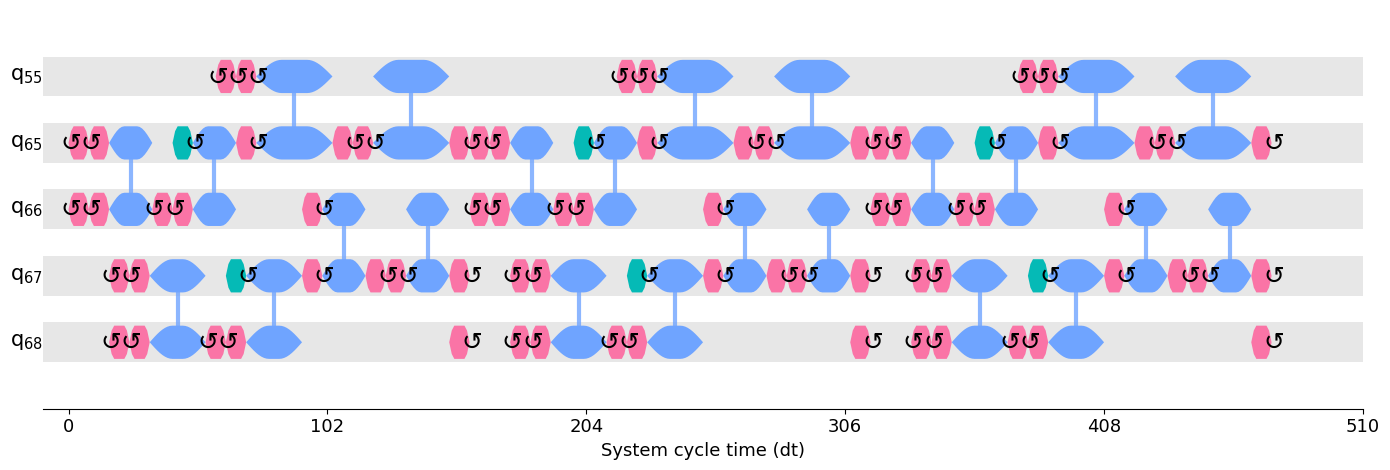

In [56]:
# Draw timeline of circuit with conventional gates
draw_timeline(
    ising_circuit_conventional,
    idle_wires=False,
    target=backend_conventional.target,
    time_range=(0, 500),
    style=IQXSimple(),
)

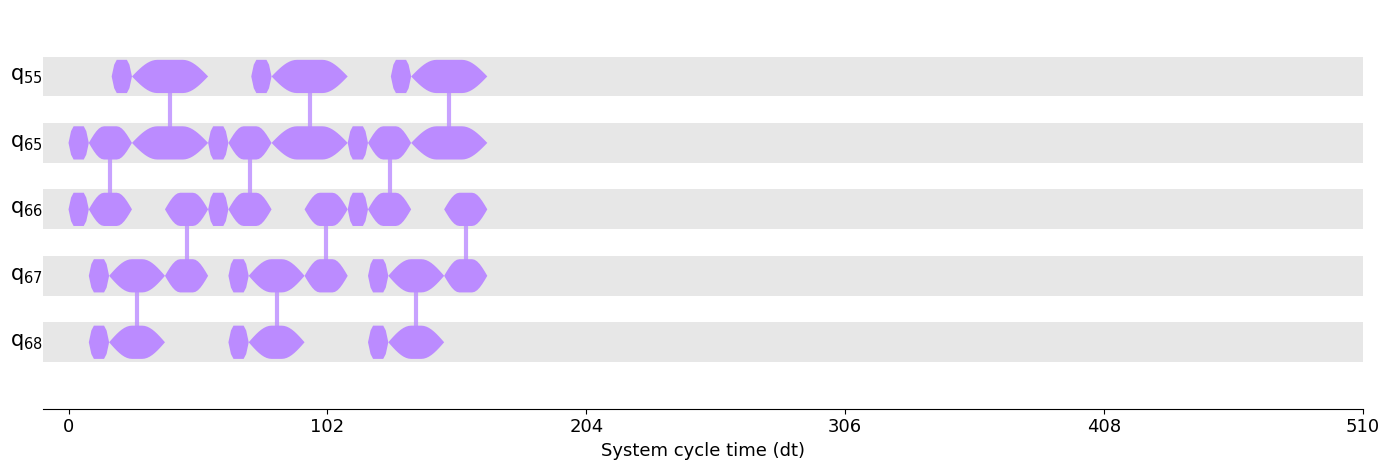

In [57]:
# Draw timeline of circuit with fractional gates
draw_timeline(
    ising_circuit_fractional,
    idle_wires=False,
    target=backend_fractional.target,
    time_range=(0, 500),
    style=IQXSimple(),
)

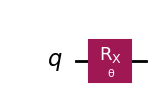

In [58]:
qc = QuantumCircuit(1)
param = Parameter("θ")
qc.rx(param, 0)
qc.draw("mpl")

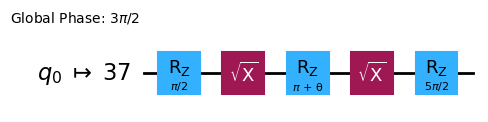

In [59]:
# Decomposition of an RX(θ) gate using the IBM Quantum QPU basis
service = QiskitRuntimeService()
backend = service.backend("ibm_torino")
optimization_level = 3
pm = generate_preset_pass_manager(optimization_level, backend=backend)
transpiled_circuit = pm.run(qc)
transpiled_circuit.draw("mpl", idle_wires=False)

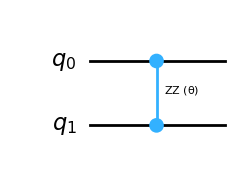

In [60]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.transpiler import generate_preset_pass_manager
 
from qiskit_ibm_runtime import QiskitRuntimeService
 
qc = QuantumCircuit(2)
param = Parameter("θ")
qc.rzz(param, 0, 1)
qc.draw("mpl")

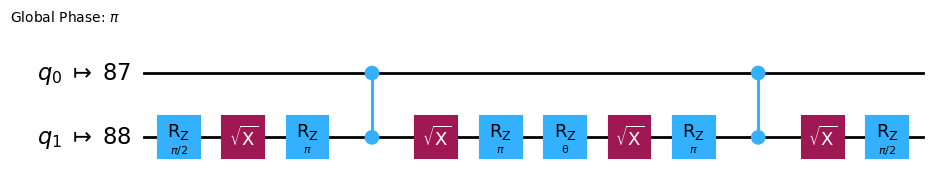

In [61]:
# Decomposition of an RZZ(θ) gate using the IBM Quantum QPU basis
service = QiskitRuntimeService()
backend = service.backend("ibm_torino")
optimization_level = 3
pm = generate_preset_pass_manager(optimization_level, backend=backend)
transpiled_circuit = pm.run(qc)
transpiled_circuit.draw("mpl", idle_wires=False)